# Importing Useful Modules 🔥🔥🔥

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading train and test files using pandas 

In [3]:
train=pd.read_csv("/content/drive/MyDrive/train.csv")
test=pd.read_csv("/content/drive/MyDrive/test.csv")


### Throwing light on the train dataset

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **PassengerId**: Unique passenger id assigned to each and every passenger.
* **Pclass**: Denotes Ticket for example 1st Class, 2nd Class and 3rd Class.
* **Name**: Denotes name of the passenger.
* **Sex**: Denotes Gender of the passenger.
* **Age**: Age of the particular person.
* **SibSp**: Number of **Siblings/Spouses** Travelling with a passenger.
* **ParCh**: Nummber of **Parents** travelling with each passenger. 
* **Ticket**: TickeID assigned. 
* **Fare**: Cost of the ticket.
* **Cabin**: Cabin number assigned to the passenger. 
* **Embarked**: Boarding Port of the passenger. 

**_NaN Values denotes that data about that field of a particular passenger is not available due to some circumstances_**

In [5]:
train.shape

(891, 12)

> As you can see that train files consist of 891 entries with 12 features each. 

In [6]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C


### Describing the _train_ dataframe

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Checking data types and number of non-null values in _train_ dataset

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Throwing light on _test_ dataset.

In [10]:
test.shape

(418, 11)

In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
survived=train[train['Survived']==1]
died=train[train['Survived']==0]
print("Survived: %.2f"%((len(survived)/891)*100),"%")
print("Died: %.2f"%((len(died)/891)*100),"%")

Survived: 38.38 %
Died: 61.62 %


## Relations between features and survival 


### Survival vs Pclass

In [15]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
survived_pclass=train.groupby('Pclass').Survived.value_counts()
survived_pclass

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

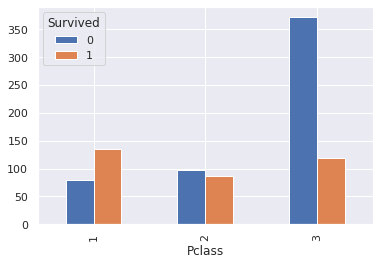

In [17]:
survived_pclass.unstack(level=1).plot(kind='bar')

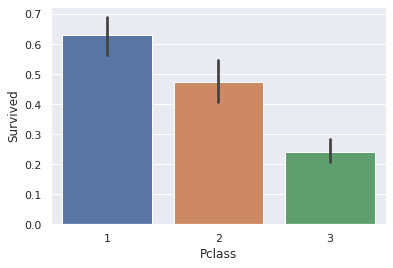

In [18]:
sns.barplot(x='Pclass',y='Survived',data=train)

### Survival vs Gender

In [19]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
gender_survival = train.groupby('Sex').Survived.value_counts()
gender_survival

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

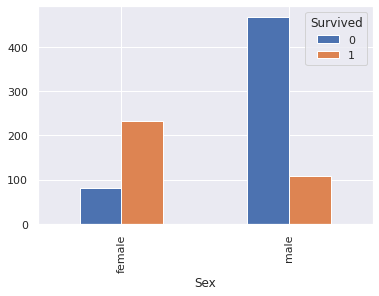

In [21]:
gender_survival.unstack().plot(kind='bar')

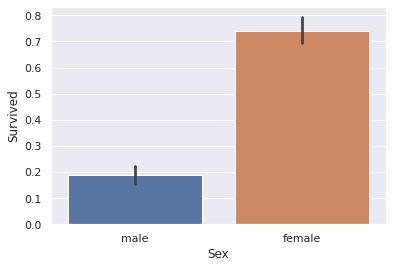

In [22]:
  sns.barplot(x='Sex',y='Survived',data=train)

### Survival vs Gender & Pclass

Text(0, 0.5, 'Percentage')

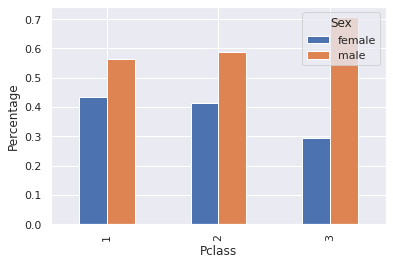

In [23]:
tab=pd.crosstab(train['Pclass'],train['Sex'])
tab.div(tab.sum(1),axis=0).plot(kind='bar')
plt.xlabel("Pclass")
plt.ylabel("Percentage")

### Survival vs Embarked

In [24]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
temp=['Embarked','Survived']
train[temp].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


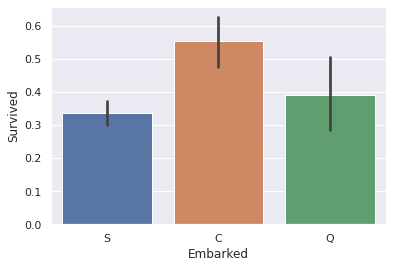

In [26]:
sns.barplot(x='Embarked',y='Survived',data=train)

### Parch vs Survival  

In [27]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [28]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [29]:
temp=['Parch','Survived']
train[temp].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


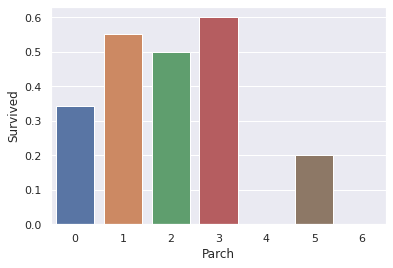

In [30]:
sns.barplot(x='Parch',y='Survived',ci=None,data=train)

### Sibsp vs Sirvival 


In [31]:
 train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [32]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [33]:
temp=['SibSp','Survived']
train[temp].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


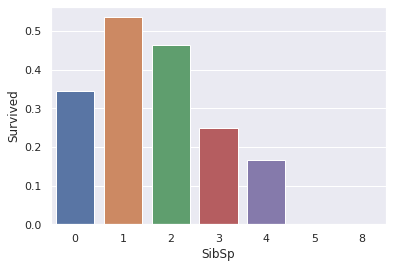

In [34]:
sns.barplot(x='SibSp',y='Survived',ci=None,data=train)

### Age vs Survivial 

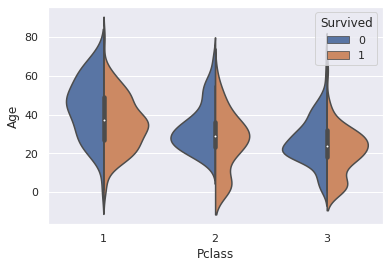

In [35]:
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=train,split=True,subplots=True)

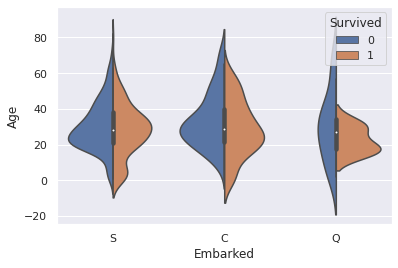

In [36]:
sns.violinplot(x='Embarked',y='Age',hue='Survived',data=train,split=True,subplots=True)

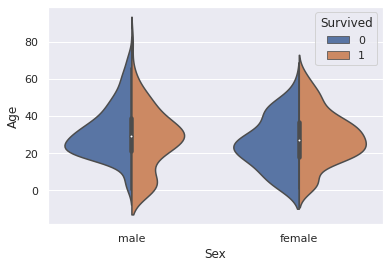

In [37]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=train,split=True)

In [38]:
count=train[train['Age']==25]
print(len(count))

23


In [39]:
sur=train['Survived']
gen=train['Sex']
total_survived=train[sur==1]
total_died=train[sur==0]
male_survived=train[(sur==1) & (gen=='male')]
male_died=train[(sur==0) & (gen=='male')]
female_survived=train[(sur==1) & (gen=='female')]
female_died=train[(sur==0) & (gen=='female')]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


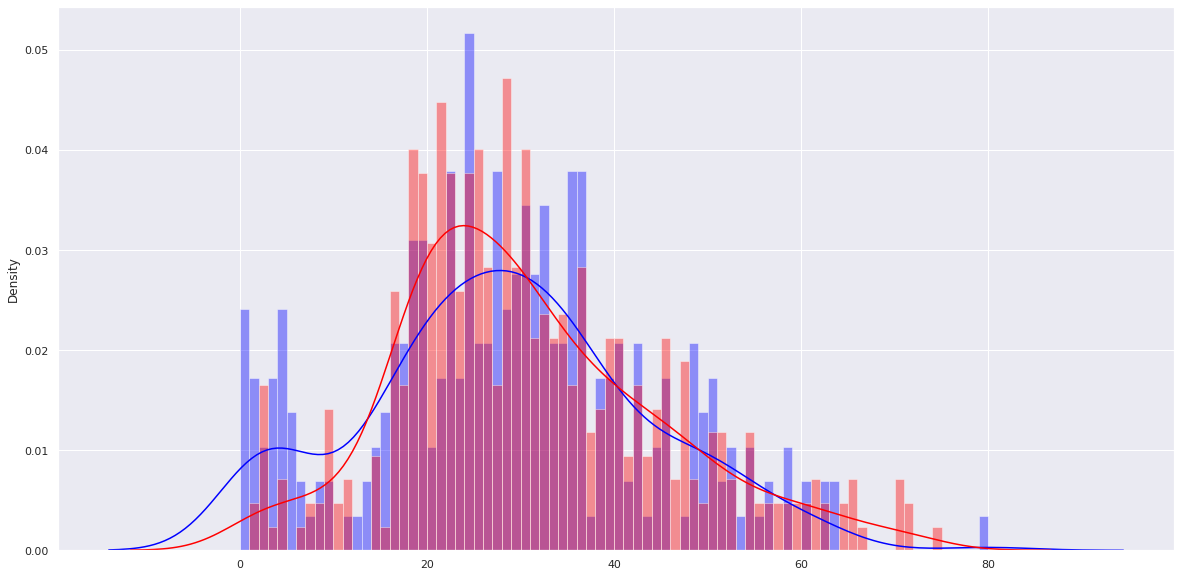

In [40]:
sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(total_survived['Age'].dropna().values,color='blue',bins=range(0,81,1))
sns.distplot(total_died['Age'].dropna().values,color='red',bins=range(0,81,1))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

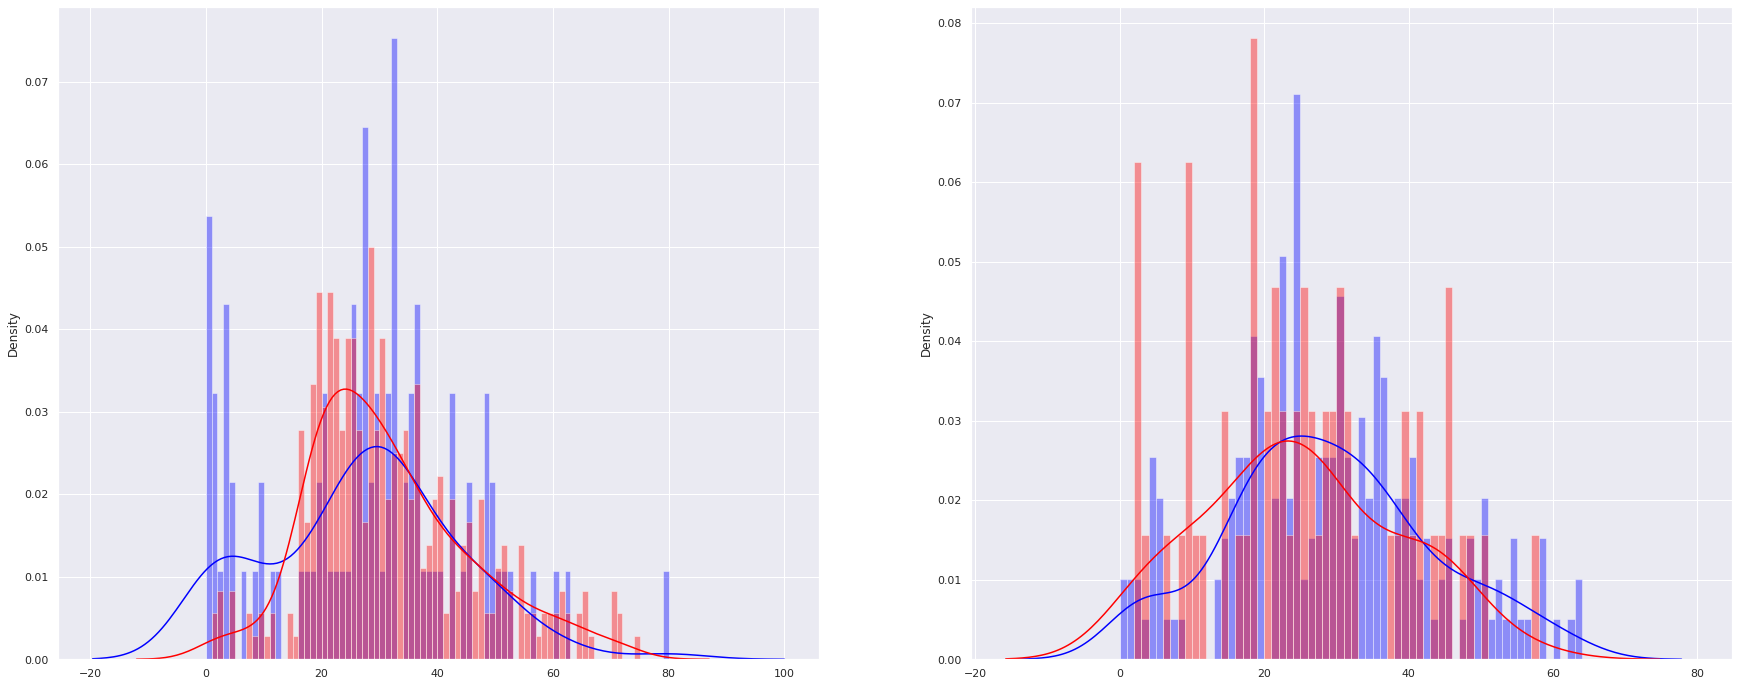

In [41]:
plt.figure(figsize=([30,12]))

plt.subplot(121)
sns.distplot(male_survived['Age'].dropna().values,color='blue',bins=range(0,81,1))
sns.distplot(male_died['Age'].dropna().values,color='red',bins=range(0,81,1))
plt.subplot(122)
sns.distplot(female_survived['Age'].dropna().values,color='blue',bins=range(0,81,1))
sns.distplot(female_died['Age'].dropna().values,color='red',bins=range(0,81,1))

## Correaltion Matrix 

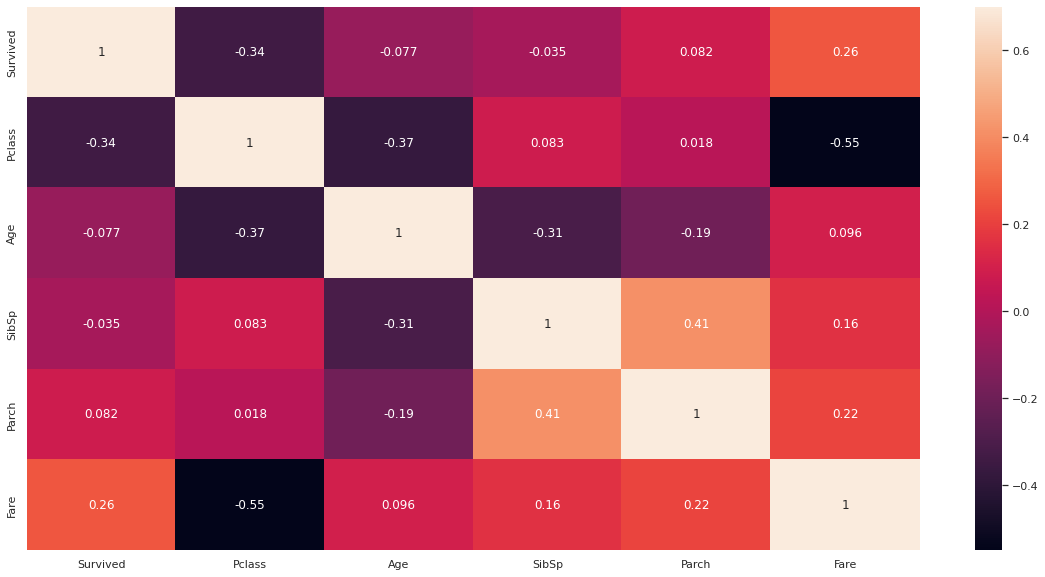

In [42]:

sns.heatmap(train.drop('PassengerId',axis=1).corr(),vmax=0.6999,annot=True)

# Feature Engineering 


## Name Feature 

In [43]:
train_test_data=[train, test]

for df in train_test_data:
  df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.')

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [45]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [46]:
for df in train_test_data:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
   'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


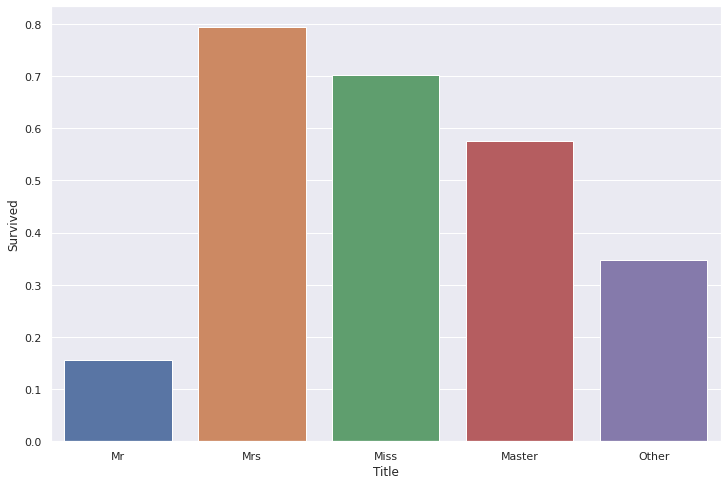

In [47]:
plt.figure(figsize=([12,8]))
sns.barplot(x='Title',y='Survived',data=train,ci=None)

In [48]:
map={'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Other':5}
for df in train_test_data:
  df['Title']=df['Title'].map(map)
  df['Title']=df['Title'].fillna(0);

## Gender Feature 

In [49]:
for df in train_test_data:
  df['Sex']=df['Sex'].map({'male':0,'female':1}).astype(int)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


## Embarked Feature 

In [51]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
for df in train_test_data:
  df['Embarked']=df['Embarked'].fillna('S')

In [53]:
for df in train_test_data:
  df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


## Fare Feature 

In [55]:
for df in train_test_data:
  df['Fare']=df['Fare'].fillna(train['Fare'].median())

In [56]:
train['FareBand']=pd.qcut(train['Fare'],4)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,"(7.91, 14.454]"


In [58]:
for df in train_test_data:
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[ df['Fare'] > 31, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,NaN,0,1,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,3,C85,1,3,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,1,NaN,0,2,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3,C123,0,3,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,1,NaN,0,1,"(7.91, 14.454]"


## SibSp Feature & Parch Feature

In [60]:
for df in train_test_data:
  df['FamilySize']=df['SibSp']+df['Parch']+1


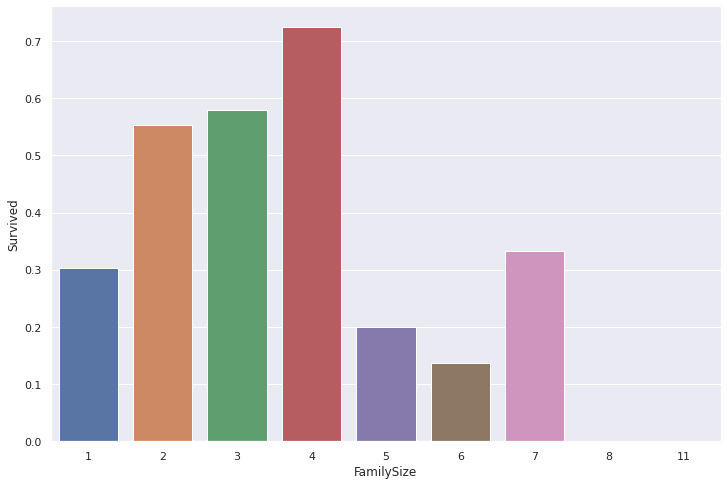

In [61]:
plt.figure(figsize=([12,8]))
sns.barplot(x='FamilySize',y='Survived',ci=None,data=train)

## Age Feautre

In [62]:
for df in train_test_data:
    age_avg = df['Age'].mean()
    age_std = df['Age'].std()
    age_null_count = df['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    df['Age'][np.isnan(df['Age'])] = age_null_random_list
    df['Age'] = df['Age'].astype(int)
    
train['AgeBand'] = pd.cut(train['Age'], 5)

print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.513514
1   (16.0, 32.0]  0.362812
2   (32.0, 48.0]  0.362934
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [63]:
for df in train_test_data:
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age'] = 4

## Feature Extraction

In [64]:
toDrop=['Name','SibSp','Parch','Ticket','Cabin']
train=train.drop(toDrop,axis=1)
test=test.drop(toDrop,axis=1)
train=train.drop(['FareBand','PassengerId','AgeBand'],axis=1)

In [65]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,0,0,1,2
1,1,1,1,2,3,1,3,2
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,2
4,0,3,0,2,1,0,1,1


In [66]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,2
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,3


# Building Model and Checking accuracy 

In [67]:
x_train=train.drop('Survived',axis=1)
y_train=train['Survived']
x_test=test.drop('PassengerId',axis=1)
x_train.shape, y_train.shape, x_test.shape

((891, 7), (891,), (418, 7))

## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=round(model.score(x_train,y_train)*100,2)
print("Accuracy: "+str(acc)+" %")

Accuracy: 80.81 %


## SVM 

In [69]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=round(model.score(x_train,y_train)*100,2)
print("Accuracy: "+str(acc)+" %")

Accuracy: 83.5 %


## Linear SVM 

In [70]:
from sklearn.svm import LinearSVC
model=LinearSVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=round(model.score(x_train,y_train)*100,2)
print("Accuracy: "+str(acc)+" %")

Accuracy: 80.7 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


## KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=round(model.score(x_train,y_train)*100,2)
print("Accuracy: "+str(acc)+" %")

Accuracy: 85.3 %


## Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=round(model.score(x_train,y_train)*100,2)
print("Accuracy: "+str(acc)+" %")

Accuracy: 89.11 %


## Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=round(model.score(x_train,y_train)*100,2)
print("Accuracy: "+str(acc)+" %")

Accuracy: 89.11 %


In [74]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=round(model.score(x_train,y_train)*100,2)
print("Accuracy: "+str(acc)+" %")

Accuracy: 80.25 %


Accuracy: 89 % 

Confusion Matrix in Numbers
[[518  31]
 [ 66 276]]



NameError: ignored

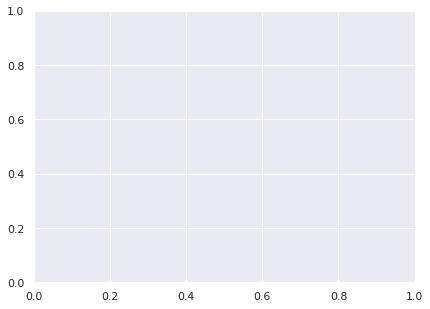

In [75]:
from sklearn.metrics import confusion_matrix
import itertools

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred_random_forest_training_set = model.predict(x_train)
acc_random_forest = round(model.score(x_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)
plt.figure(figsize = (15,5))
print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d', cmap = "Blues")

In [ ]:

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

# plt.subplot(121)
# sns.heatmap(df_cnf_matrix, annot=True, fmt='d', cmap = "Blues")

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True, cmap = "Blues")

In [79]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=round(model.score(x_train,y_train)*100,2)
print("Accuracy: "+str(acc)+" %")

Accuracy: 89.11 %


In [77]:
ans=pd.DataFrame({
    "PassengerId":test['PassengerId'],
    "Survived":y_pred
})
ans.to_csv('ans.csv',index=False)

In [80]:
import pickle
file = open('random_forest_titanic_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)